In [1]:
import numpy as np
import pandas as pd
import os

data = pd.read_csv('./housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data = data.select_dtypes(include= ['int64','float64'])
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [7]:
x=data.median_income.values.reshape(-1,1)
x
y=data.median_house_value.values.reshape(-1,1)
y
x.max(), x.min(), y.max(), y.min()

(15.0001, 0.4999, 500001.0, 14999.0)

In [13]:
# Splitting train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 1), (4128, 1), (16512, 1), (4128, 1))

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = lm.predict(x_test)
y_pred
print('MAE of regression is:',mean_absolute_error(y_test,y_pred)) 

MAE of regression is: 63411.367356375406


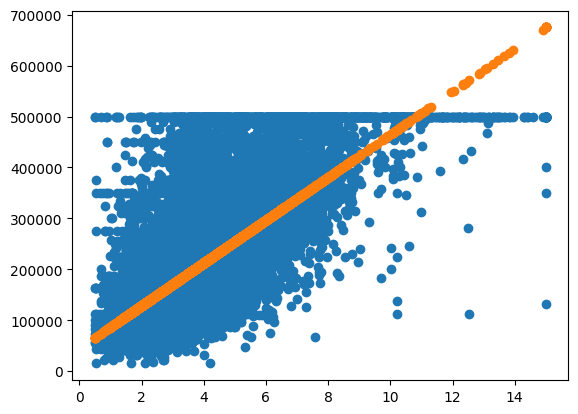

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.scatter(x_test,y_pred)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
trans = PolynomialFeatures(degree=2)
x = trans.fit_transform(x)
x.shape 

(20640, 3)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,y_train.shape, x_test.shape,y_test.shape 

((16512, 3), (16512, 1), (4128, 3), (4128, 1))

In [22]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train) 

LinearRegression()

In [24]:
# Prediction for train data
y_train_pred=lm.predict(x_train)
mean_absolute_error(y_train,y_train_pred)
# Prediction for test dataset
y_test_pred=lm.predict(x_test)
print('MAE of Polynomial regression is ',mean_absolute_error(y_test,y_test_pred)) 

MAE of Polynomial regression is  62481.903810770025


In [25]:
#Select features for multiple regression
x=data[['median_income','households','housing_median_age']]
y=data.median_house_value.values.reshape(-1,1)
x.max(),x.min(),y.max(),y.min()

(median_income           15.0001
 households            6082.0000
 housing_median_age      52.0000
 dtype: float64,
 median_income         0.4999
 households            1.0000
 housing_median_age    1.0000
 dtype: float64,
 500001.0,
 14999.0)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,y_train.shape, x_test.shape,y_test.shape
x_train.max(),y_train.max(), x_test.max(),y_test.max() 

(median_income           15.0001
 households            6082.0000
 housing_median_age      52.0000
 dtype: float64,
 500001.0,
 median_income           15.0001
 households            4769.0000
 housing_median_age      52.0000
 dtype: float64,
 500001.0)

In [27]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
#Prediction for train data
y_train_pred=lm.predict(x_train)
mean_absolute_error(y_train,y_train_pred)
#prediction for test dataset
y_test_pred=lm.predict(x_test)
print('MAE of Multiple regressions is ',mean_absolute_error(
y_test,y_test_pred)) 

MAE of Multiple regressions is  59113.100855603814
